In [5]:
#PROBLEM: There is a dinner party, We want to invite as many as guest
#         possible, but there are some constraint between the guest as given below.
#         We can invite:
#                       James and Lars
#                             or
#                       Kirk  and Rob
#                          and not
#                       Lars  and Rob
##############################################################################################
#NOTE: qiskit will take the names in alaphatibcal order, for eg: q0=James
#                                                                q1=Kirk
#                                                                q2=Lars
#                                                                q3=Rob

In [21]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram 
from qiskit.algorithms import Grover,AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit.tools.visualization import matplotlib
%matplotlib inline

In [22]:
#Phase oracle is used for writing the logical statements
Expression=PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
problem = AmplificationProblem(oracle=Expression, is_good_state=Expression.evaluate_bitstring)
backend = Aer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)


/tmp/ipykernel_237/1159617628.py:5: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  grover = Grover(quantum_instance=backend)


In [23]:
print(result.circuit_results[0])

{'1101': 251, '1100': 272, '0011': 246, '0111': 255}


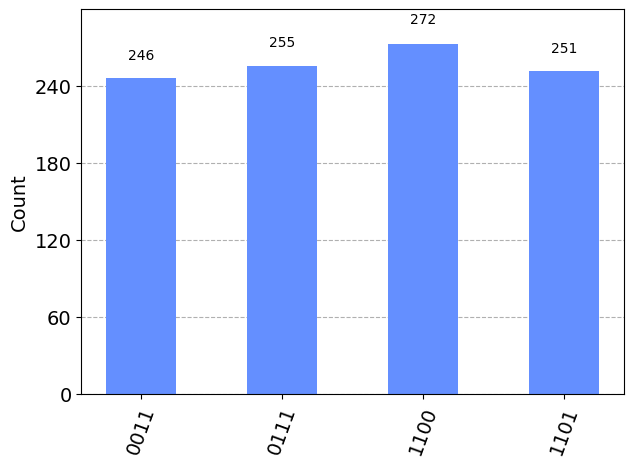

In [24]:
plot_histogram(result.circuit_results)